In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pickle
import codecs
import hashlib

## Preprocessing (skip to the next one)

In [ ]:
# df2 = df.copy()
# df2['Labels'] = df2['Tos']
# df2['Flows'] = df2['Flags']
# df2['Packets_Bytes'] =df2['Addr:Port.1']
# df2['Flags'] =df2['Addr:Port'].astype(str)+df2['Dst'].astype(str)
# df2['Tos'] = df2['IP.1']
# df2['Packets']= df2['Addr:Port']
# df2['Dst_IP:Port'] = df2['IP']
# df2['Src_IP:Port'] = df2['Prot']
# df2['Prot'] = df2['Durat']
# df2['Duration'] = df2['start']
# df2['Date_start'] = df2['Date'].astype(str)+" "+df2['flow'].astype(str)
# # df2.drop(['Date','Durat','Src','Addr:Port','IP','flow','start','Src','Label','Packets'],axis = 1,inplace = True)
# df2 = df2[['Date_start','Duration','Prot','Src_IP:Port','Dst_IP:Port','Flags','Tos','Packets_Bytes','Flows','Labels']]

## Start from here

In [ ]:
# df.to_pickle('capture20110818.pcap.netflow_ps.pickle')

In [2]:
df = pd.read_pickle('capture20110818.pcap.netflow_ps.pickle')
df

,Date_start,Duration,Prot,Src_IP,Dst_IP,Flags,Tos,Packets_Bytes,Flows,Labels
0,2011-08-18 10:19:13.328,0.002,TCP,147.32.86.166,212.24.150.110,FRPA_0,4,321,1,Background
1,2011-08-18 10:19:13.328,4.995,UDP,82.39.2.249,147.32.84.59,INT0,617,40095,1,Background
2,2011-08-18 10:19:13.329,4.996,UDP,147.32.84.59,82.39.2.249,INT0,1290,1909200,1,Background
3,2011-08-18 10:19:13.330,0.000,TCP,147.32.86.166,147.32.192.34,A_0,1,66,1,Background
4,2011-08-18 10:19:13.330,0.000,TCP,212.24.150.110,147.32.86.166,FPA_0,2,169,1,Background
5,2011-08-18 10:19:13.333,4.185,TCP,115.184.37.24,147.32.84.2,A_0,25,1658,1,Background
6,2011-08-18 10:19:13.335,4.978,TCP,80.78.79.156,147.32.86.24,PA_0,311,70580,1,Background
7,2011-08-18 10:19:13.335,4.978,UDP,147.32.86.24,151.41.188.39,INT0,292,64319,1,Background
8,2011-08-18 10:19:13.336,0.000,UDP,82.73.244.56,147.32.84.118,INT0,1,145,1,Background
9,2011-08-18 10:19:13.336,0.000,ICMP,147.32.84.118,82.73.244.56,URP0,1,173,1,Background


In [4]:
# Delete the background
df = df[['Date_start','Duration','Prot','Src_IP','Dst_IP','Flags','Tos','Packets_Bytes','Flows','Labels']]
df2 = df[df['Labels'] != 'Background'].reset_index(drop = True)
df2.head()


,Date_start,Duration,Prot,Src_IP,Dst_IP,Flags,Tos,Packets_Bytes,Flows,Labels
0,2011-08-18 10:19:13.347,4.985,TCP,147.32.80.13,147.32.85.88,PA_0,91,86277,1,LEGITIMATE
1,2011-08-18 10:19:13.392,0.000,TCP,147.32.86.110,74.125.232.214,A_0,1,66,1,LEGITIMATE
2,2011-08-18 10:19:13.411,4.921,TCP,147.32.85.88,147.32.80.13,A_0,49,3234,1,LEGITIMATE
3,2011-08-18 10:19:13.460,4.742,TCP,147.32.84.59,74.125.108.208,A_0,118,7080,1,LEGITIMATE
4,2011-08-18 10:19:13.486,0.000,TCP,147.32.84.59,74.125.232.215,A_0,1,60,1,LEGITIMATE


### Factorization and categorization

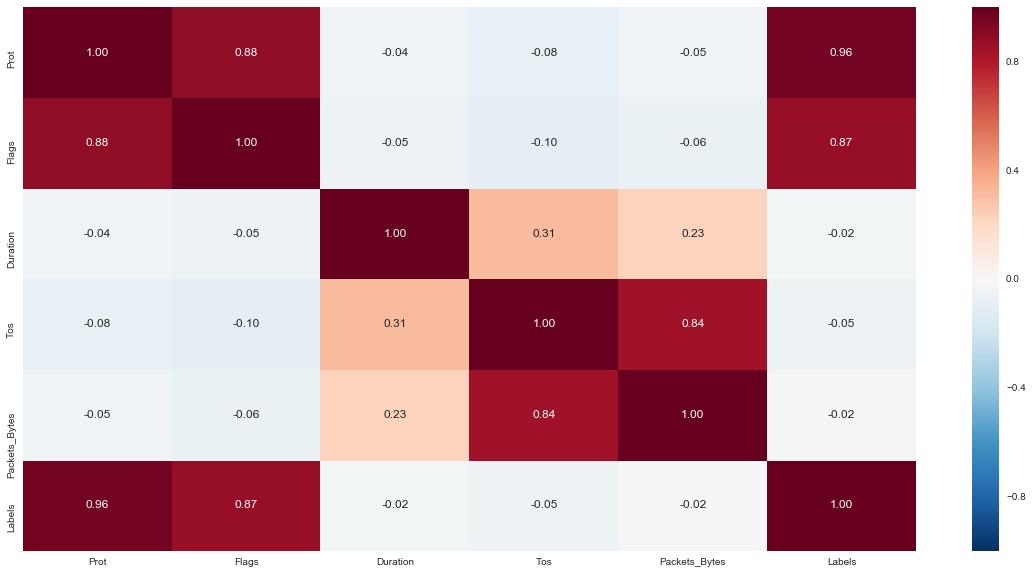

In [5]:
df2_fac_features = df2[['Prot','Flags','Labels']]
df2_num_features = df2[['Duration','Tos','Packets_Bytes']]

df2_fac_features = df2_fac_features.apply(lambda x: x.factorize()[0])
df2_features = pd.concat([df2_fac_features,df2_num_features],axis = 1)
df2_features = df2_features[['Prot','Flags','Duration','Tos','Packets_Bytes','Labels']]
df2_features_corr = df2_features.corr()

# plot correlation matrix
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
a = sns.heatmap(df2_features_corr, annot=True, fmt=".2f",ax=ax)
plt.show(a)


### View Protocol and Flags, but eventually we changed to Protocol and Packets_Bytes

Prot  Labels    
ICMP  Botnet        312328
      LEGITIMATE      1014
TCP   Botnet          7569
      LEGITIMATE    311260
UDP   Botnet          3544
      LEGITIMATE      9643
dtype: int64


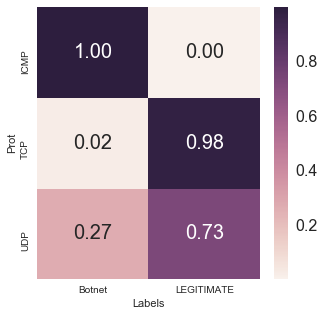

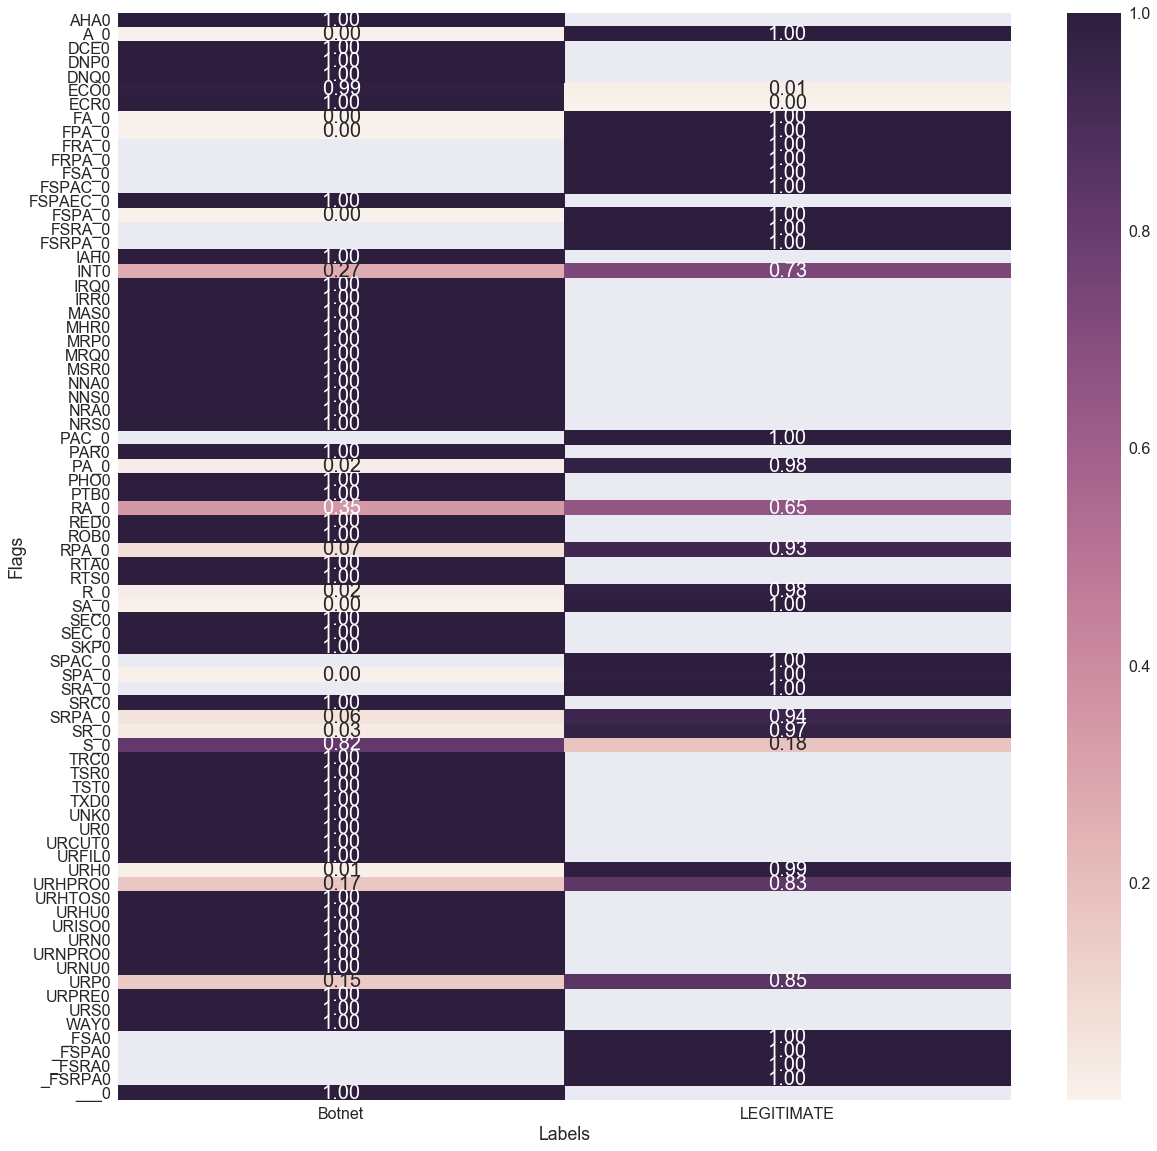

In [10]:
####### Protocol
df2_ProtFlags_labels = df2[['Prot','Flags','Labels']]
print(df2_ProtFlags_labels.groupby(['Prot','Labels']).size())

df3 = pd.DataFrame({'count':df2_ProtFlags_labels.groupby(['Labels','Prot']).size()}).reset_index()
df3 = df3.pivot(index = 'Prot',columns = 'Labels',values= 'count')
df4 = df3.div(df3.sum(axis=1), axis=0)
df4
plt.clf()
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.6)
a = sns.heatmap(df4, annot=True, fmt=".2f",ax=ax,annot_kws={"size": 20})
plt.show(a)

####### Flags
df3 = pd.DataFrame({'count':df2_ProtFlags_labels.groupby(['Labels','Flags']).size()}).reset_index()
df3 = df3.pivot(index = 'Flags',columns = 'Labels',values= 'count')
df4 = df3.div(df3.sum(axis=1), axis=0)
df4
plt.clf()
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1.6)
a = sns.heatmap(df4, annot=True, fmt=".2f",ax=ax,annot_kws={"size": 20})
plt.show(a)

In [7]:
#select prot and 
# 147.32.84.191,147.32.84.165
# df_infected_host = df2[df2['Src_IP']=='147.32.84.165']#.reset_index(drop = True)

In [6]:
# df_infected_host

## Try combining Prot and packets, the same as in the paper

infected hosts
- 147.32.84.165, 147.32.84.191, 147.32.84.192, 147.32.84.193
147.32.84.204, 147.32.84.205, 147.32.84.206, 147.32.84.207
147.32.84.208, 147.32.84.209


Normal hosts
- 147.32.84.170, 147.32.84.134, 147.32.84.164, 147.32.87.36
147.32.80.9 , 147.32.87.11

In [8]:
botnet_ips = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
             '147.32.84.205','147.32.84.206','147.32.84.207','147.32.84.208','147.32.84.209']

normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36',
              '147.32.80.9']

## Visualization before encoding

### Categorizing
#### Protocol : UDP  -->  0 ,    TCP  -->  1,     ICMP  -->  2        Mi = 3


      147.32.84.165  147.32.84.170
Prot                              
0               409          14551
1               342           6414
2             19138             15


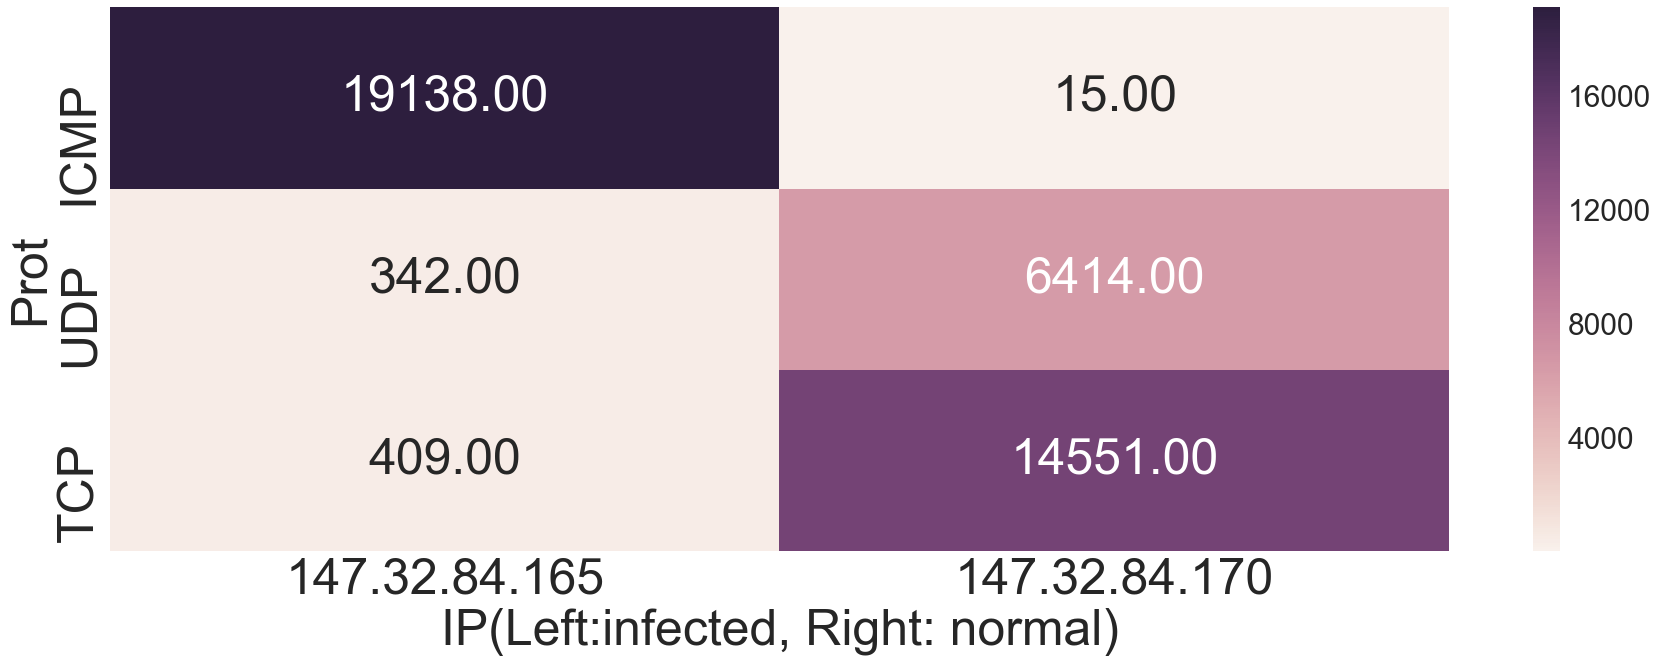

In [21]:
df_all = df[['Prot']]
df_all_IP = df[['Src_IP','Labels','Packets_Bytes']]
# print(df[df['Src_IP']=='147.32.84.170'].groupby('Prot').size())
df_all = df_all.apply(lambda x: x.factorize()[0])
df_all = pd.concat([df_all,df_all_IP],axis = 1)
df_all = df_all[df_all['Labels']!='Background'].reset_index(drop = True)
df_infected = df_all[df_all['Src_IP']=='147.32.84.165'].reset_index(drop = True)
df_prot_plt = pd.DataFrame({'147.32.84.165':df_infected.groupby('Prot').size()}).reset_index()
df_prot_plt.set_index('Prot',inplace=True)
df_normal = df_all[df_all['Src_IP']=='147.32.84.170'].reset_index(drop = True)
df_normal = pd.DataFrame({'147.32.84.170':df_normal.groupby('Prot').size()}).reset_index()
df_prot_plt['147.32.84.170'] = df_normal['147.32.84.170']
print(df_prot_plt)
plt.clf()
fig, ax = plt.subplots(figsize=(30,10))
sns.set(font_scale=3)
h = sns.heatmap(np.flipud(np.array(df_prot_plt)), annot=True, fmt=".2f",ax=ax,annot_kws={"size": 50})
h.set_xticklabels(labels=(['147.32.84.165','147.32.84.170']),rotation = 0, fontsize=50)
h.set_yticklabels(labels = ['TCP' , 'UDP',  'ICMP'], fontsize=50)
h.set_ylabel('Prot',fontsize=50)
h.set_xlabel('IP(Left:infected, Right: normal)',fontsize=50)
# plt.savefig("Prot.png")
# plt.savefig("Prot.svg", format='svg', dpi=1200)
plt.show(h)


### Packets_Bytes : 
#### set the regions : 
#### x < 1000  --> 0
#### 1000 < x < 5000  --> 1
#### 5000< x < 10000  --> 2
#### x >10000  --> 3

     147.32.84.165  147.32.84.170
lab                              
0              432          18218
1            17864           2363
2               19            178
3             1574            221


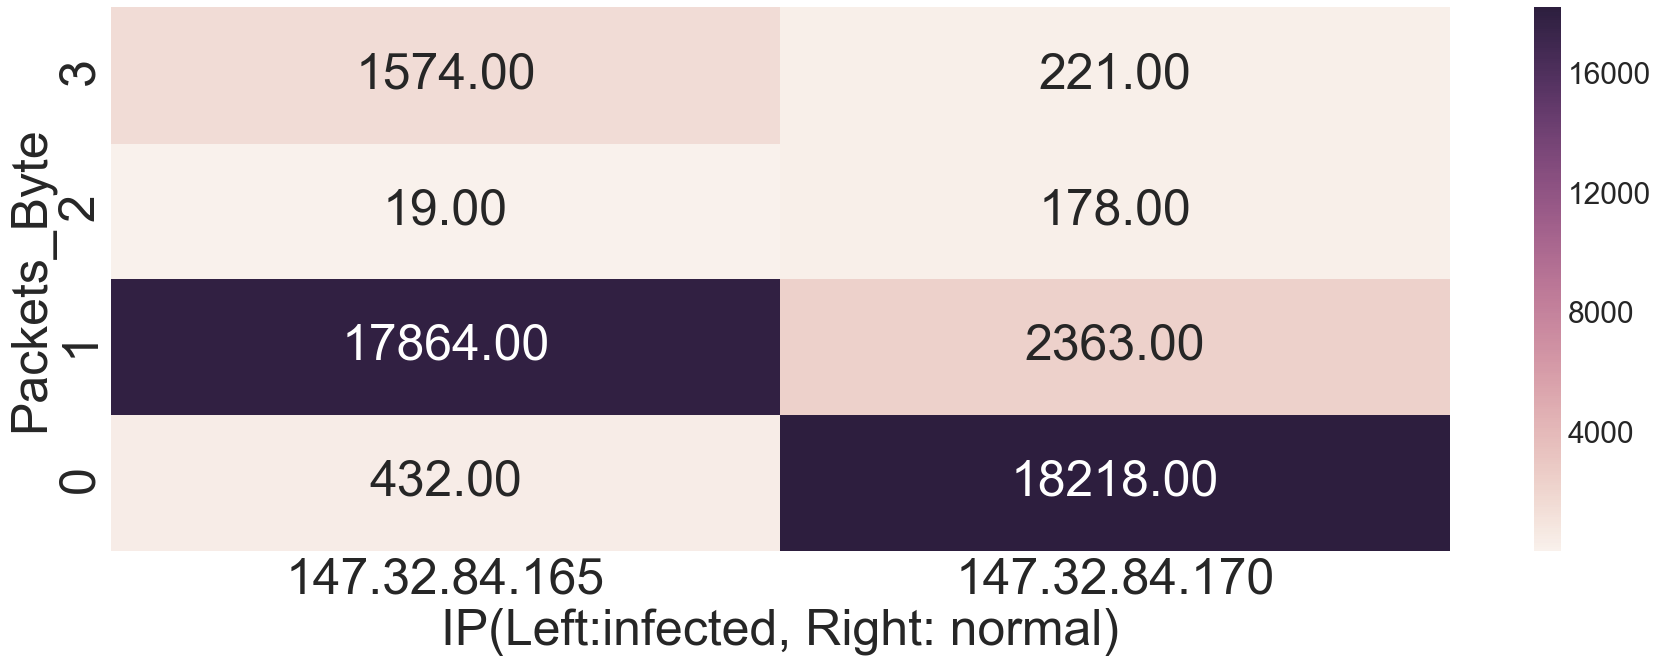

In [9]:
# Group
df_all = df[['Prot']]
df_all_IP = df[['Src_IP','Labels','Packets_Bytes']]
df_all = df_all.apply(lambda x: x.factorize()[0])
df_all = pd.concat([df_all,df_all_IP],axis = 1)
df_all = df_all[df_all['Labels']!='Background'].reset_index(drop = True)
df_infected = df_all[df_all['Src_IP']=='147.32.84.165'].reset_index(drop = True)
df_infected['lab'] = df_infected[['Packets_Bytes']].apply(lambda x : pd.cut(x,[0,1000,5000,10000,9999999999999],labels=[0,1,2,3]))
df_packets_plt = pd.DataFrame({'147.32.84.165':df_infected.groupby('lab').size()}).reset_index()

# Categorization
df_packets_plt.set_index('lab',inplace=True)
df_normal = df_all[df_all['Src_IP']=='147.32.84.170'].reset_index(drop = True)
df_normal['lab'] = df_normal[['Packets_Bytes']].apply(lambda x : pd.cut(x,[0,1000,5000,10000,9999999999999],labels=[0,1,2,3]))
df_normal = pd.DataFrame({'147.32.84.170':df_normal.groupby('lab').size()}).reset_index()
df_packets_plt['147.32.84.170'] = df_normal['147.32.84.170']
print(df_packets_plt)

# Plot
plt.clf()
fig, ax = plt.subplots(figsize=(30,10))
sns.set(font_scale=3)
h = sns.heatmap(np.flipud(np.array(df_packets_plt)), annot=True, fmt=".2f",ax=ax,annot_kws={"size": 50})
h.set_xticklabels(labels=(['147.32.84.165','147.32.84.170']),rotation = 0, fontsize=50)
h.set_yticklabels(labels = list(df_packets_plt.index), fontsize=50)
h.set_ylabel('Packets_Byte',fontsize=50)
h.set_xlabel('IP(Left:infected, Right: normal)',fontsize=50)
# plt.savefig("Packets.png")
plt.show(h)



## Encoding :  
### Protocol:          UDP  -->  0 ,    TCP  -->  1,     ICMP  -->  2        Mi = 3
### Packets_Bytes:      x< 20%--> 0,  20%< x < 80% -->1 , x>80% --> 2, Mi = 3
### However, 20% and 80% is the same = 1066,
###   therefore  x < 20% =1066   -->   0,     x>20%=80%=1066   -->  1        Mi =2

In [10]:
df_all = df[['Prot']]
df_all_IP = df[['Src_IP','Labels','Packets_Bytes']]
df_all = df_all.apply(lambda x: x.factorize()[0])
df_all = pd.concat([df_all,df_all_IP],axis = 1)
df_all = df_all[df_all['Labels']!='Background'].reset_index(drop = True)
df_infected = df_all[df_all['Src_IP']=='147.32.84.165'].reset_index(drop = True)
# df_infected = df_all[df_all['Src_IP']=='147.32.84.191']
df_bot_packets = df_infected.sort_values(by = 'Packets_Bytes').reset_index(drop = True)

# Find the value of 20% and 80%
twenty_flag = 0
eighty_flag = 0

# Calcualte 20% and 80% turns out to be the same : 1066
twentiest_number = df_bot_packets.loc[int(len(df_bot_packets)*0.2),'Packets_Bytes']
eightiest_number = df_bot_packets.loc[int(len(df_bot_packets)*0.8),'Packets_Bytes']
packets = np.array(df_infected['Packets_Bytes'])
packets = (packets>=1066)*1
df_infected['Packets_Bytes_categorized'] = packets
# df_infected.drop('Packets_Bytes',axis = 1,inplace = True)
df_infected




,Prot,Src_IP,Labels,Packets_Bytes,Packets_Bytes_categorized
0,1,147.32.84.165,Botnet,64,0
1,1,147.32.84.165,Botnet,87,0
2,0,147.32.84.165,Botnet,629,0
3,1,147.32.84.165,Botnet,76,0
4,1,147.32.84.165,Botnet,180,0
5,0,147.32.84.165,Botnet,60,0
6,0,147.32.84.165,Botnet,60,0
7,0,147.32.84.165,Botnet,60,0
8,0,147.32.84.165,Botnet,60,0
9,0,147.32.84.165,Botnet,60,0


In [11]:
## Encoding
a = df_infected['Prot'].nunique()
b = df_infected['Packets_Bytes_categorized'].nunique()
packets = np.array(df_all['Packets_Bytes'])
packets = (packets>=1066)*1
df_all['Packets_Bytes_categorized'] = packets

#### Formula : a*(#b)+ b
# df_all['Code'] = df_all['Prot']*b + df_all['Packets_Bytes_categorized']
df_all['Code'] = df_all['Prot']*b + df_all['Packets_Bytes_categorized']
df_all.head(50)

# Compare with other infected hosts
df_infected = df_all[df_all['Src_IP']=='147.32.84.165']
print(df_infected.groupby('Code').size())
df_infected_2 = df_all[df_all['Src_IP']=='147.32.84.191']
print(df_infected_2.groupby('Code').size())

# Compare with normal hosts
df_legitimate = df_all[df_all['Src_IP']=='147.32.80.13']
print(df_legitimate.groupby('Code').size())

Code
0      409
2       24
3      318
5    19138
dtype: int64
Code
0      330
2       21
3      319
5    20824
dtype: int64
Code
0    22252
1    14697
dtype: int64



### Test more

In [16]:

#observe
infected_code_list =[]
# infected_IPs = df_all[df_all['Labels']=='Botnet']['Src_IP'].unique()
infected_IPs = botnet_ips
for ip in range(2):
    df_infected = df_all[df_all['Src_IP']==infected_IPs[ip]]
    try:
        if np.max(df_infected.groupby('Code').size()) > 800:
            print(df_infected.groupby('Code').size())
            pd_temp = pd.DataFrame({'count' : df_infected.groupby('Code').size()})
            max_code = pd_temp.idxmax()
            print("save %d"%max_code)
        else:
            pass
    except:
        pass
    try:
        infected_code_list = infected_code_list +list(max_code)
    except:
        pass
infected_code_list = list(set(infected_code_list))
infected_code_list

Code
0      409
2       24
3      318
5    19138
dtype: int64
save 5
Code
0      330
2       21
3      319
5    20824
dtype: int64
save 5


[5]

In [17]:
#for Legitimate
IPs = df_all[df_all['Labels']=='LEGITIMATE']['Src_IP'].unique()
df_current_IP = df_all[df_all['Src_IP']==IPs[100]]
df_current_IP.groupby('Code').size()
    


Code
0    11
1     4
dtype: int64

### Save the highest code (5) for detecting the infected hosts
### Test on all infected hosts (# = 10)

In [20]:
# IPs = df_all[df_all['Labels']=='LEGITIMATE']['Src_IP'].unique()
#find similarity between the Botnets
# IPs = df_all[df_all['Labels']=='Botnet']['Src_IP'].unique()

IPs = botnet_ips

count = 0
for ip in IPs:
    df_current_IP = df_all[df_all['Src_IP']==ip]
#     df_notinfected.groupby('Code').size()
    current_code_list = list(df_current_IP.groupby('Code').size().index)
    pd_temp = pd.DataFrame({'count' : df_current_IP.groupby('Code').size()})
    max_code = pd_temp.idxmax()
#     print(df_current_IP.groupby('Code').size(),'max:',max_code)
    if np.max(df_current_IP.groupby('Code').size())>500:
        if infected_code_list in current_code_list:
            count+=1
    print("IP: %s : saved_code_list max_code %s"%(ip,max_code))
print("for all %d of botnet, there are %d detected as botnet"%(len(IPs),count))

IP: 147.32.84.165 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.191 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.192 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.193 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.204 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.205 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.206 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.207 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.208 : saved_code_list max_code count    5
dtype: int64
IP: 147.32.84.209 : saved_code_list max_code count    5
dtype: int64
for all 10 of botnet, there are 10 detected as botnet


### Test on normal hosts (# = 5)

In [23]:
#find similarity between the Botnets
# IPs = df_all[df_all['Labels']=='LEGITIMATE']['Src_IP'].unique()
IPs = normal_ips
count = 0
for ip in IPs:
    df_current_IP = df_all[df_all['Src_IP']==ip]
    current_code_list = list(df_current_IP.groupby('Code').size().index)
    pd_temp = pd.DataFrame({'count' : df_current_IP.groupby('Code').size()})
#     print(pd_temp)
    max_code = pd_temp.idxmax()
    print(np.max(df_current_IP.groupby('Code').size()),max_code)
    if np.max(df_current_IP.groupby('Code').size())>500:
        if infected_code_list in current_code_list:
            count+=1
print("For all %d of legitimate, there are %d detected as botnet"%(len(IPs),count))

11914 count    0
dtype: int64
4689 count    0
dtype: int64
6228 count    0
dtype: int64
763 count    1
dtype: int64
729 count    2
dtype: int64
For all 5 of legitimate, there are 0 detected as botnet


### Plot distributions of encoding on all known hosts

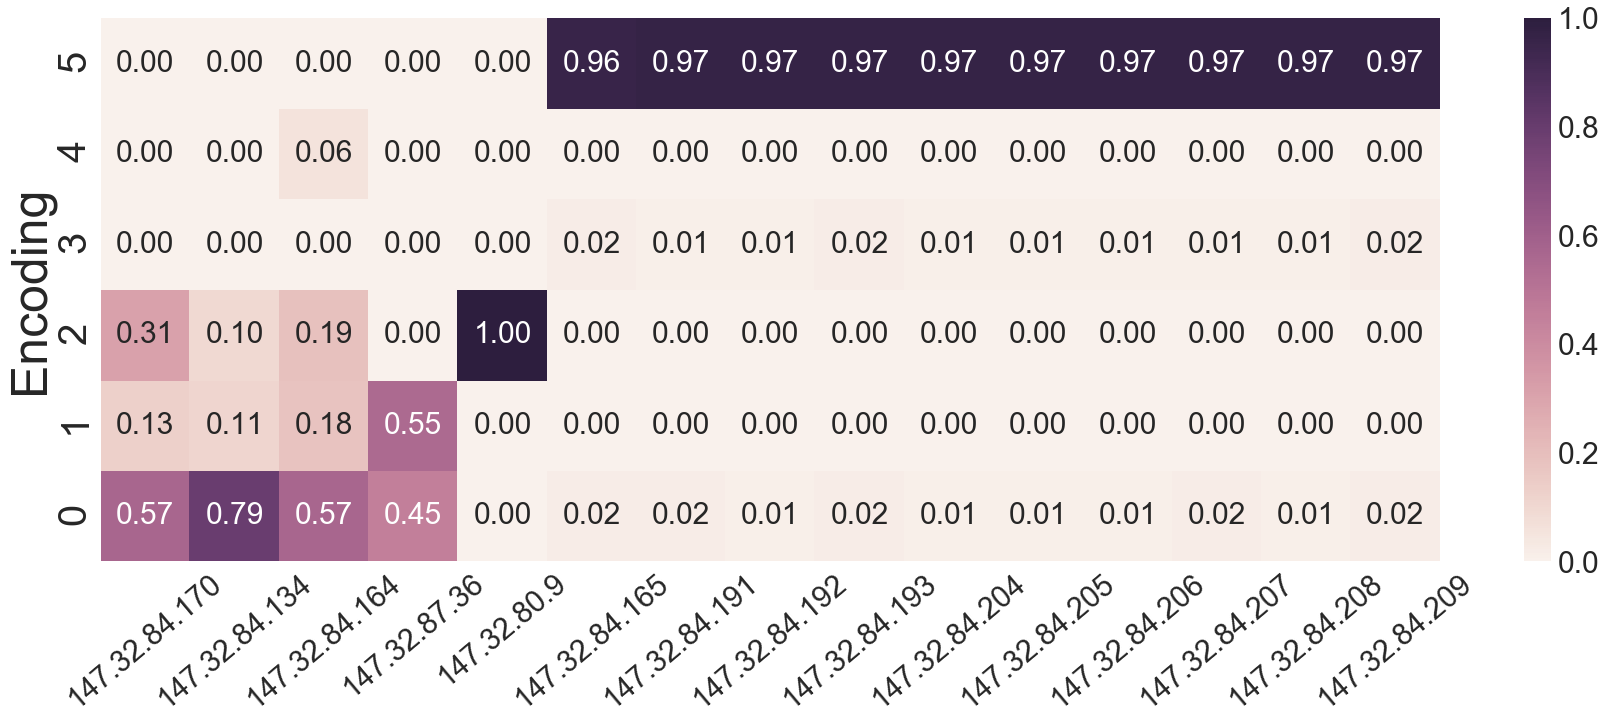

In [24]:
code_list = list(df_all.groupby('Code').size().index)

Mat = np.zeros((len(normal_ips+botnet_ips),len(code_list)))
#find similarity between the Botnets
# IPs = df_all[df_all['Labels']=='LEGITIMATE']['Src_IP'].unique()

count = 0
i = 0
for ip in (normal_ips+botnet_ips):
    df_current_IP = df_all[df_all['Src_IP']==ip]
#     df_notinfected.groupby('Code').size()
    current_code_list = list(df_current_IP.groupby('Code').size().index)
    pd_temp = pd.DataFrame({'count' : df_current_IP.groupby('Code').size()})
    pd_temp = pd_temp/pd_temp.sum(axis=0)
#     print(pd_temp)
    
    for code,count in pd_temp.iterrows():
        Mat[i,code_list.index(code)] = round(count,2)
    i+=1


# print(Mat)
# print(np.fliplr(Mat))
# df_plot = pd.DataFrame(Mat,columns = code_list,index=(normal_ips+botnet_ips))
df_plot = pd.DataFrame(np.fliplr(Mat).T,columns =(normal_ips+botnet_ips) ,index=code_list[::-1])
df_plot
# # df3 = df3.pivot(index = 'Prot',columns = 'Labels',values= 'count')
# # df4 = df3.div(df3.sum(axis=1), axis=0)
# # df4
plt.clf()
fig, ax = plt.subplots(figsize=(30,10))
sns.set(font_scale=3)
h = sns.heatmap(df_plot, annot=True, fmt=".2f",ax=ax,annot_kws={"size": 30})
h.set_xticklabels(labels=(normal_ips+botnet_ips),rotation = 40, fontsize=30)
h.set_yticklabels(labels =(code_list), fontsize=40)
h.set_ylabel('Encoding',fontsize=50)
plt.show(h)

## Test on all hosts

In [57]:
# df_save = df_all[['Src_IP','Labels','Code']]
# df_date = df[df['Labels']!='Background'].reset_index(drop = True)
# df_save['Date_start'] = df_date['Date_start']
# df_save = df_save[['Date_start','Src_IP','Code','Labels']]
# df_save
# df_save.to_pickle('part4.pickle')

### Create the Table for IP --> Labels

In [25]:
df_test = pd.DataFrame({'count':df_all.groupby(['Src_IP','Labels']).size()}).reset_index()
df_test.drop('count',axis =1,inplace =True)
## Test if there exists Ips that are both Legitimate and botnet
print(len(list(set((df_test['Src_IP'])))),len(df_test))

## yeah.....there are 16 Ips...
indices = []

# Consider those as Botnet
for ind,row in df_test.iterrows():
    try:
        if df_test.loc[ind+1,'Src_IP']== row['Src_IP']:
            df_test.loc[ind,'Labels'] = 'Botnet'
            indices.append((ind+1))
        else:
            pass
    except:
        pass
df_test.drop(df.index[indices], inplace = True)
df_test.reset_index(drop = True)
print(len(list(set((df_test['Src_IP'])))),len(df_test))

522 538
522 522


## Classification

In [26]:
IPs = list(df_test['Src_IP'])
classified = [];
for ip in IPs:
    df_current_IP = df_all[df_all['Src_IP']==ip]
    current_code_list = list(df_current_IP.groupby('Code').size().index)
    pd_temp = pd.DataFrame({'count' : df_current_IP.groupby('Code').size()})
    max_code = pd_temp.idxmax()
#     print(current_code_list, max_code)
#     print(np.max(df_current_IP.groupby('Code').size()),max_code)
    if np.max(df_current_IP.groupby('Code').size())>0:
        if infected_code_list in current_code_list:
#             print(ip)
            classified.append('Botnet')
        else:
            classified.append('LEGITIMATE')
#         if list(df_test[df_test['Src_IP']==ip]['Labels']) == ['Botnet']:
#             print(np.max(df_current_IP.groupby('Code').size()))
    else:
        classified.append('LEGITIMATE')
print("done")

done


In [27]:
TP,TN,FP,FN = 0,0,0,0
true_labels = list(df_test['Labels'])
for i in range(len(classified)):
    if classified[i] == true_labels[i]:
        if true_labels[i] == 'Botnet':
            TP+=1
        else:
            TN+=1
    else:
        if true_labels[i] == 'Botnet':
            FN+=1
        else:
            FP+=1
print("TP: %d\nTN: %d\nFP: %d\nFN: %d"%(TP,TN,FP,FN))

TP: 11
TN: 455
FP: 0
FN: 56
